# __Home task: Keras__

In [118]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D

### __Load dataset__

In [119]:
def load_dataset():
    fn = './data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn = './data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes

train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)


In [120]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Normalize the data
train_data /= 255.0
test_data /= 255.0

train_labels_transposed = train_labels.T
test_labels_transposed = test_labels.T

print(f"Train labels shape: {train_labels_transposed.shape}")
print(f"Test labels shape: {test_labels_transposed.shape}")

Train labels shape: (1080, 1)
Test labels shape: (120, 1)


### __Display samples__

In [121]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols = n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

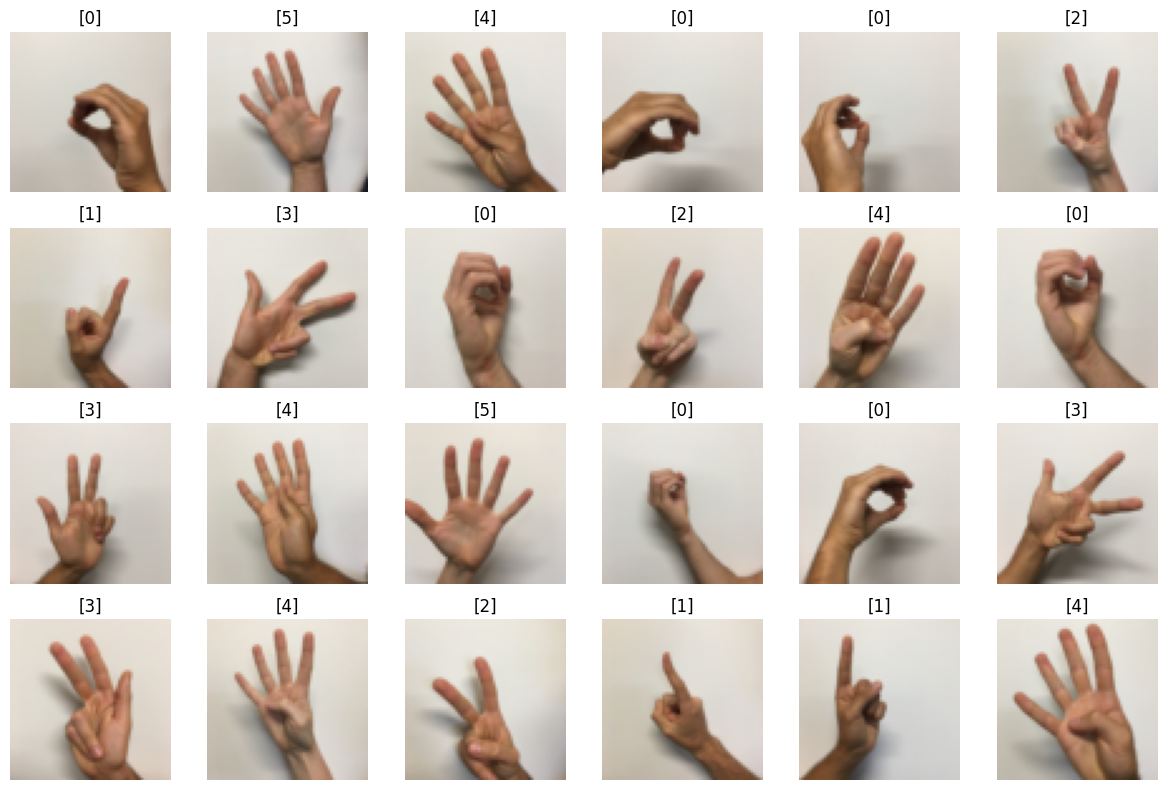

In [122]:
plt.figure(figsize=(12, 8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y=train_labels_transposed)
plt.tight_layout(h_pad=1, w_pad=1)

## __Case 1: Model with ReLU activation function, 3 Dropout layers and 3 hidden layers__

In [123]:
model_1 = Sequential([
    Conv2D(32, (3, 3), input_shape=train_data.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

In [124]:
model_1.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

history_1 = model_1.fit(
    train_data, 
    train_labels_transposed, 
    batch_size=32, 
    epochs=20, 
    verbose=1, 
    validation_data=(test_data, test_labels_transposed)
)

Epoch 1/20
34/34 [==============================] - 5s 99ms/step - loss: 1.8681 - accuracy: 0.1861 - val_loss: 1.7889 - val_accuracy: 0.2000
Epoch 2/20
34/34 [==============================] - 3s 89ms/step - loss: 1.7913 - accuracy: 0.1954 - val_loss: 1.7811 - val_accuracy: 0.2417
Epoch 3/20
34/34 [==============================] - 3s 87ms/step - loss: 1.7812 - accuracy: 0.2037 - val_loss: 1.7571 - val_accuracy: 0.2833
Epoch 4/20
34/34 [==============================] - 3s 87ms/step - loss: 1.6827 - accuracy: 0.3120 - val_loss: 1.4723 - val_accuracy: 0.4167
Epoch 5/20
34/34 [==============================] - 3s 87ms/step - loss: 1.3722 - accuracy: 0.4435 - val_loss: 1.1534 - val_accuracy: 0.5583
Epoch 6/20
34/34 [==============================] - 3s 88ms/step - loss: 1.0978 - accuracy: 0.5722 - val_loss: 0.7710 - val_accuracy: 0.7750
Epoch 7/20
34/34 [==============================] - 3s 87ms/step - loss: 0.8906 - accuracy: 0.6565 - val_loss: 0.7753 - val_accuracy: 0.6667
Epoch 8/20
34

### __Plot metrics__

In [125]:
def plot_metrics(history):
    # Plot the Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    
    # Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

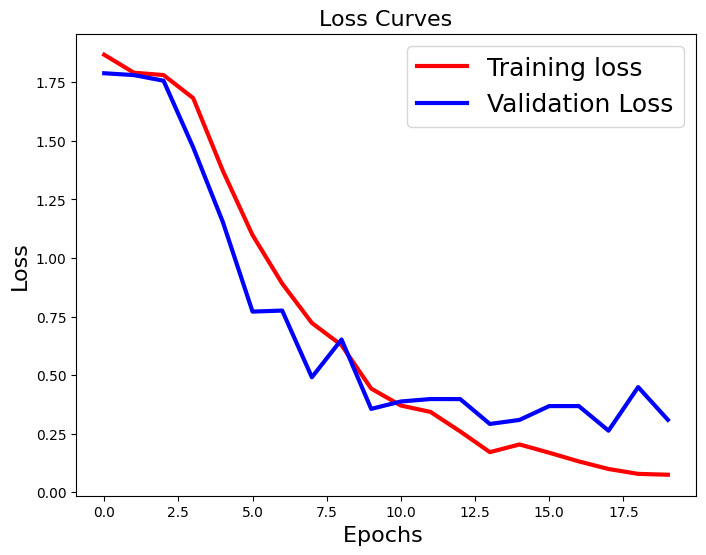

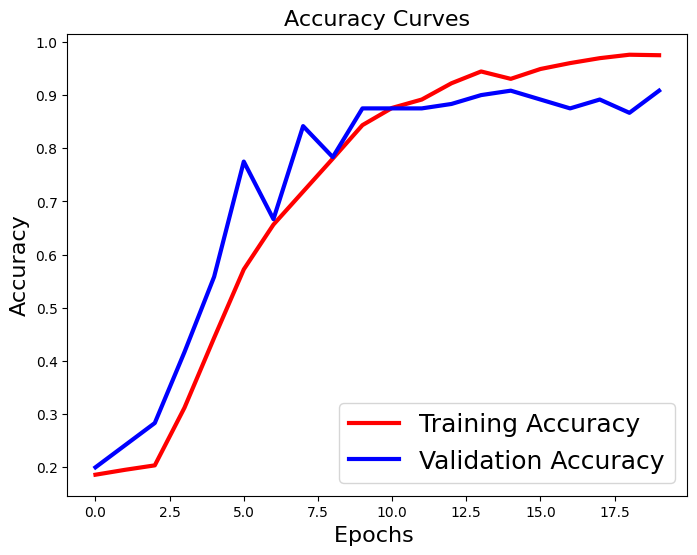

In [126]:
plot_metrics(history_1)

### __Inference__

1/1 [==============================] - 0s 101ms/step


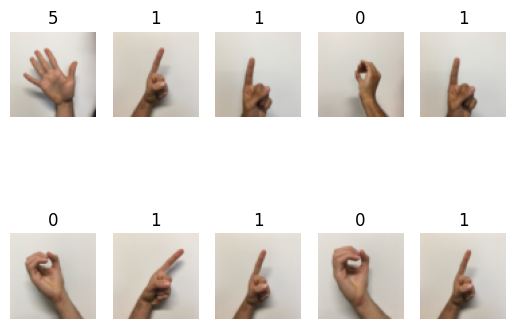

In [127]:
predicted = model_1.predict(test_data[:10]) 
classes_x = np.argmax(predicted, axis=1)

display_samples_in_grid(test_data[:10], n_rows=2, n_cols=5, y = classes[classes_x])

## __Case 2: Model with Tanh activation function, 3 Dropout layers and 3 hidden layers__

In [128]:
model_2 = Sequential([
    Conv2D(32, (3, 3), input_shape=train_data.shape[1:], activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='tanh'),
    Dropout(0.5),
    Dense(256, activation='tanh'),
    Dropout(0.5),
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

In [129]:
model_2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

history_2 = model_2.fit(
    train_data, 
    train_labels_transposed, 
    batch_size=32, 
    epochs=20, 
    verbose=1, 
    validation_data=(test_data, test_labels_transposed)
)

Epoch 1/20
34/34 [==============================] - 4s 97ms/step - loss: 2.3357 - accuracy: 0.1741 - val_loss: 1.8445 - val_accuracy: 0.1667
Epoch 2/20
34/34 [==============================] - 3s 88ms/step - loss: 2.3236 - accuracy: 0.1685 - val_loss: 1.8688 - val_accuracy: 0.1667
Epoch 3/20
34/34 [==============================] - 3s 87ms/step - loss: 2.3201 - accuracy: 0.1546 - val_loss: 1.8155 - val_accuracy: 0.1667
Epoch 4/20
34/34 [==============================] - 3s 87ms/step - loss: 2.3336 - accuracy: 0.1500 - val_loss: 1.8668 - val_accuracy: 0.1667
Epoch 5/20
34/34 [==============================] - 3s 87ms/step - loss: 2.1818 - accuracy: 0.1796 - val_loss: 1.8303 - val_accuracy: 0.1667
Epoch 6/20
34/34 [==============================] - 3s 89ms/step - loss: 2.1383 - accuracy: 0.1630 - val_loss: 1.8065 - val_accuracy: 0.1667
Epoch 7/20
34/34 [==============================] - 3s 88ms/step - loss: 2.0989 - accuracy: 0.1833 - val_loss: 1.8143 - val_accuracy: 0.1667
Epoch 8/20
34

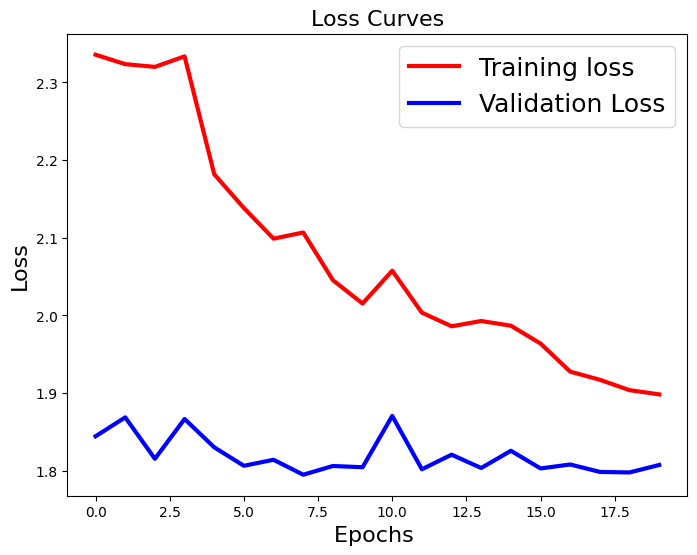

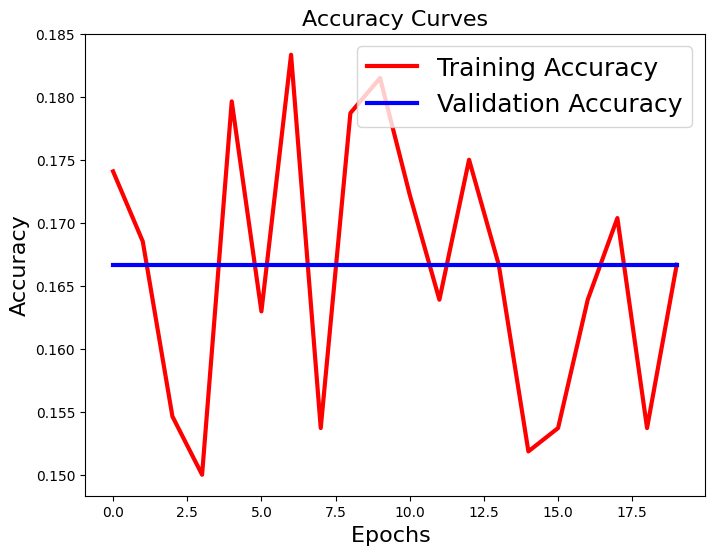

In [130]:
plot_metrics(history_2)

## __Case 3: Model with ReLU activation function, 3 hidden layers and no Dropout layers__

In [131]:
model_3 = Sequential([
    Conv2D(32, (3, 3), input_shape=train_data.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

In [132]:
model_3.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

history_3 = model_3.fit(
    train_data, 
    train_labels_transposed, 
    batch_size=32, 
    epochs=20, 
    verbose=1, 
    validation_data=(test_data, test_labels_transposed)
)

Epoch 1/20
34/34 [==============================] - 4s 92ms/step - loss: 1.8078 - accuracy: 0.2213 - val_loss: 1.7622 - val_accuracy: 0.1667
Epoch 2/20
34/34 [==============================] - 3s 87ms/step - loss: 1.4724 - accuracy: 0.4130 - val_loss: 1.1888 - val_accuracy: 0.5583
Epoch 3/20
34/34 [==============================] - 3s 87ms/step - loss: 0.8649 - accuracy: 0.6537 - val_loss: 0.7594 - val_accuracy: 0.7083
Epoch 4/20
34/34 [==============================] - 3s 86ms/step - loss: 0.5057 - accuracy: 0.8222 - val_loss: 0.4212 - val_accuracy: 0.8750
Epoch 5/20
34/34 [==============================] - 3s 87ms/step - loss: 0.3193 - accuracy: 0.8917 - val_loss: 0.3687 - val_accuracy: 0.8833
Epoch 6/20
34/34 [==============================] - 3s 87ms/step - loss: 0.2635 - accuracy: 0.9093 - val_loss: 0.2730 - val_accuracy: 0.9333
Epoch 7/20
34/34 [==============================] - 3s 86ms/step - loss: 0.1455 - accuracy: 0.9583 - val_loss: 0.3815 - val_accuracy: 0.8667
Epoch 8/20
34

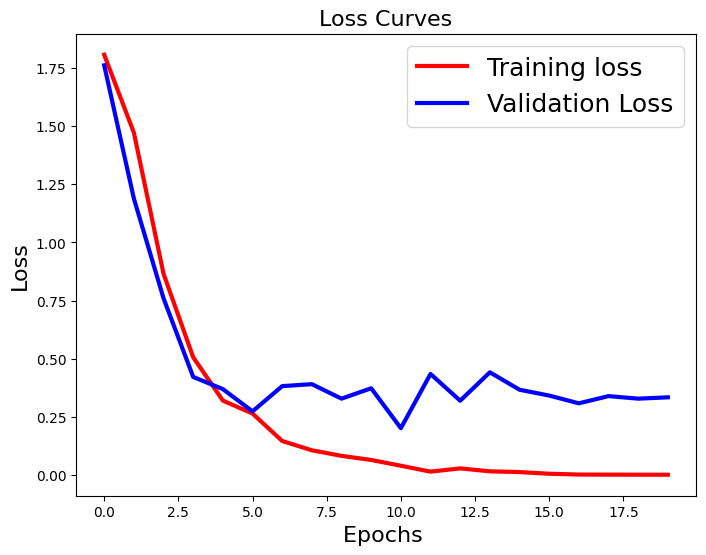

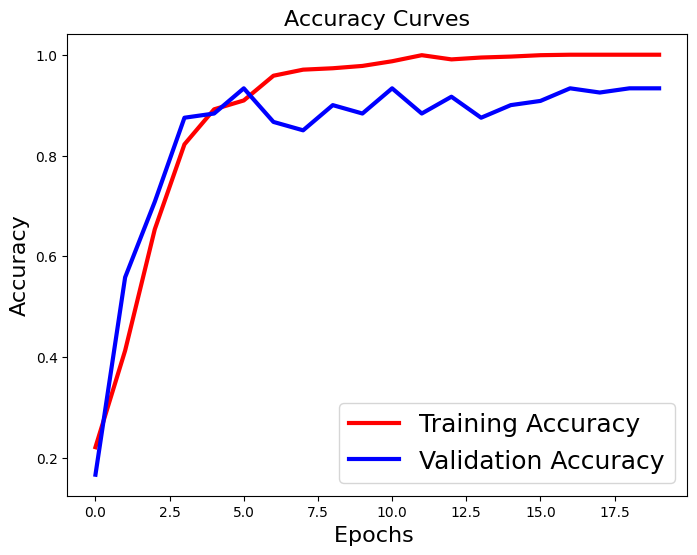

In [133]:
plot_metrics(history_3)

## __Case 4: Model with ReLU activation function and 1 hidden layer__

In [134]:
model_4 = Sequential([
    Conv2D(32, (3, 3), input_shape=train_data.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(classes), activation='softmax')
])

In [135]:
model_4.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

history_4 = model_4.fit(
    train_data, 
    train_labels_transposed, 
    batch_size=32, 
    epochs=20, 
    verbose=1, 
    validation_data=(test_data, test_labels_transposed)
)

Epoch 1/20
34/34 [==============================] - 4s 91ms/step - loss: 1.8134 - accuracy: 0.2435 - val_loss: 1.6110 - val_accuracy: 0.3917
Epoch 2/20
34/34 [==============================] - 3s 86ms/step - loss: 1.1408 - accuracy: 0.6120 - val_loss: 0.8725 - val_accuracy: 0.7250
Epoch 3/20
34/34 [==============================] - 3s 86ms/step - loss: 0.6370 - accuracy: 0.7889 - val_loss: 0.7067 - val_accuracy: 0.7167
Epoch 4/20
34/34 [==============================] - 3s 85ms/step - loss: 0.4359 - accuracy: 0.8546 - val_loss: 0.4540 - val_accuracy: 0.8000
Epoch 5/20
34/34 [==============================] - 3s 85ms/step - loss: 0.3042 - accuracy: 0.9009 - val_loss: 0.4313 - val_accuracy: 0.8500
Epoch 6/20
34/34 [==============================] - 3s 87ms/step - loss: 0.2251 - accuracy: 0.9278 - val_loss: 0.3021 - val_accuracy: 0.8917
Epoch 7/20
34/34 [==============================] - 3s 86ms/step - loss: 0.1412 - accuracy: 0.9611 - val_loss: 0.3079 - val_accuracy: 0.8833
Epoch 8/20
34

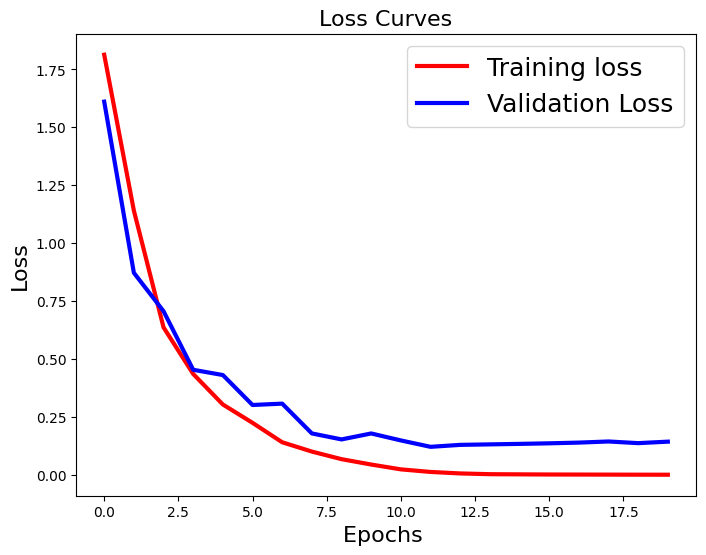

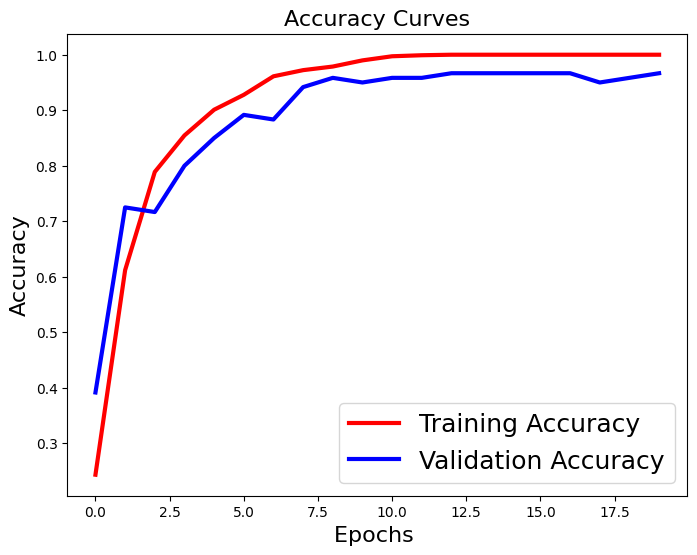

In [136]:
plot_metrics(history_4)